https://shap.readthedocs.io/en/latest/index.html

In [20]:
import shap
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from pickle import load

# shap.initjs()

In [21]:
train_data = pd.read_csv(r"../data/processed_data/oversampled_train.csv", index_col=0)
test_data = pd.read_csv(r"../data/processed_data/oversampled_test.csv", index_col=0)

In [22]:
x_train = train_data.drop(["TARGET"], axis=1)
x_test = test_data.drop(["TARGET"], axis=1)

columns = x_train.columns

scaler = load(open(r"../models/scaler.pkl", "rb"))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
model = keras.models.load_model(r"../models/neural_network/BayOpt_v1.03")

In [24]:
explainer = shap.DeepExplainer(model, x_test[:500])
shap_values = explainer.shap_values(x_test[:500])


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


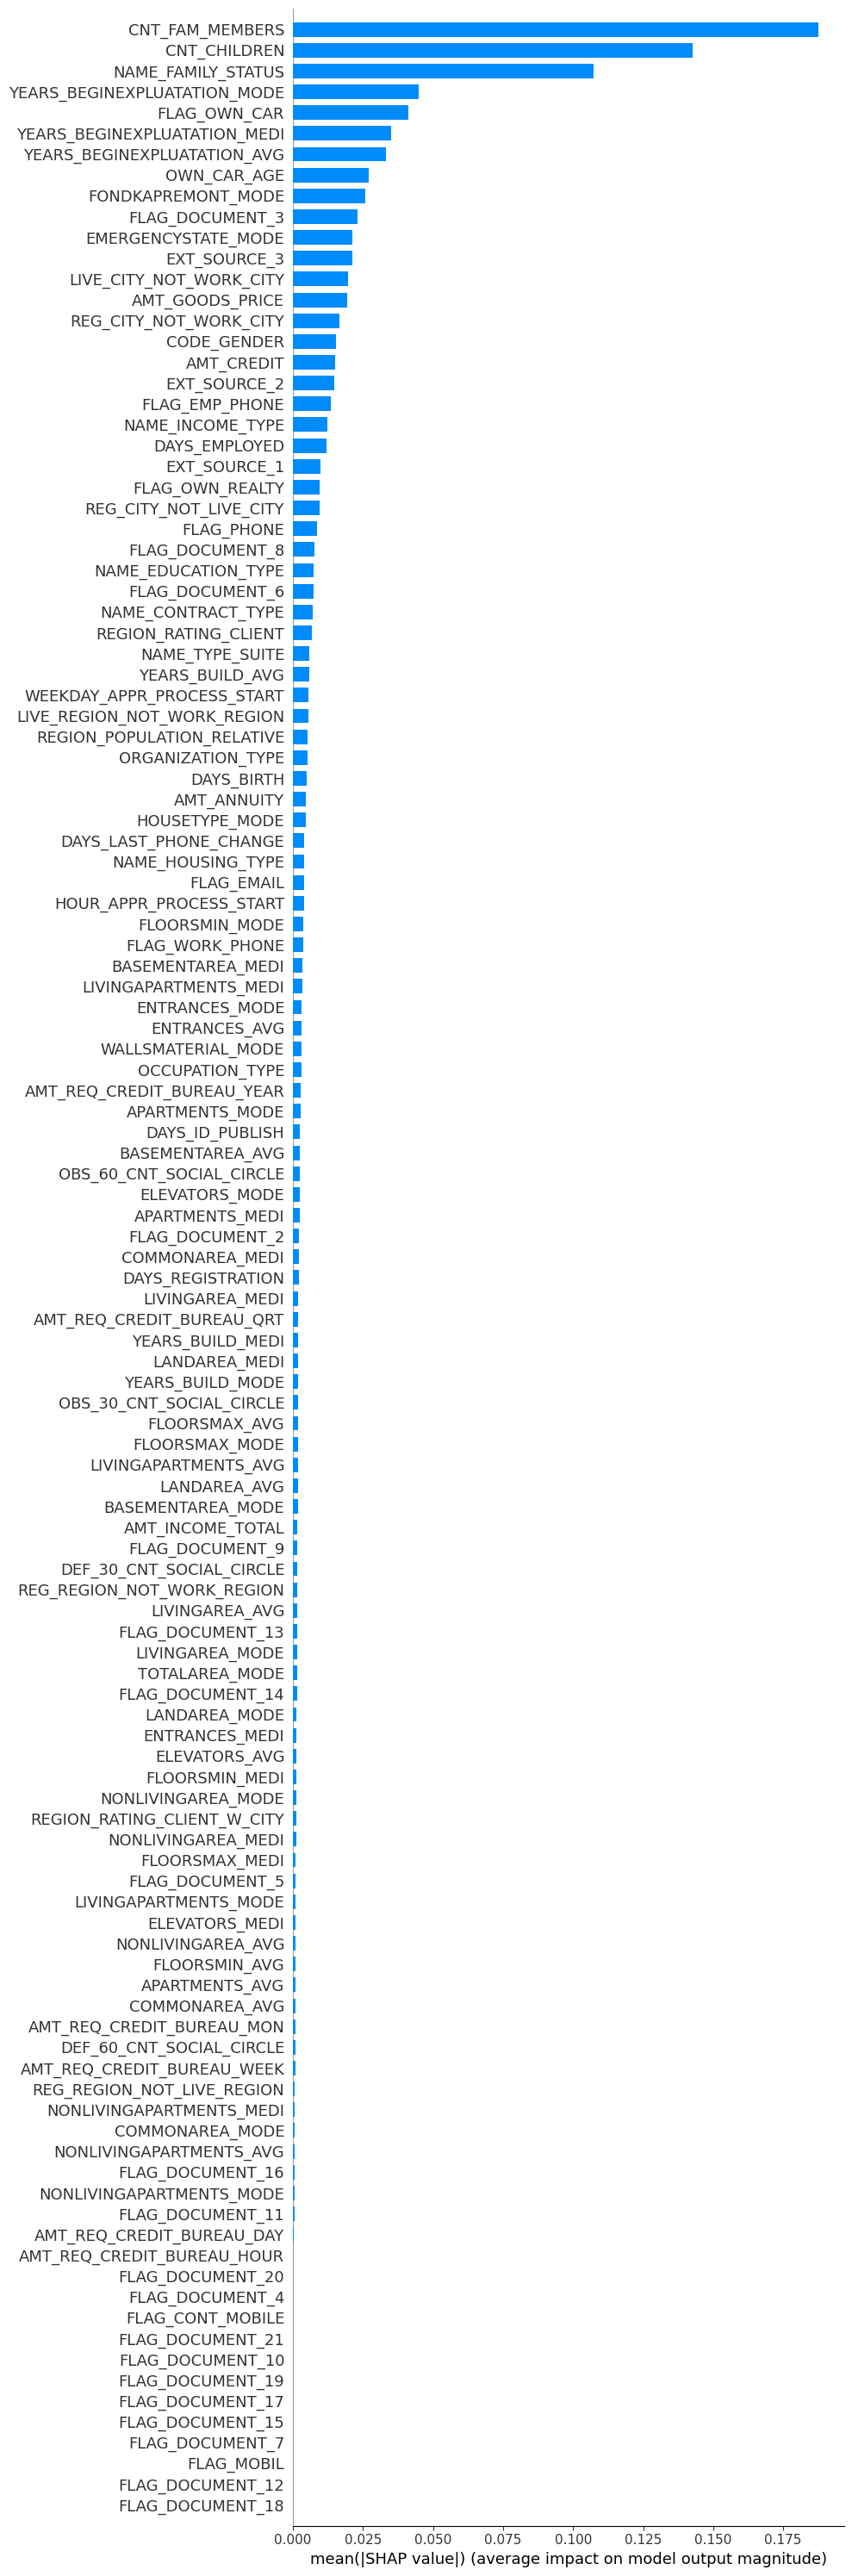

In [25]:
shap.summary_plot(
    shap_values[0], plot_type="bar", feature_names=columns, plot_size=[10, 30], max_display=x_train.shape[1]
)

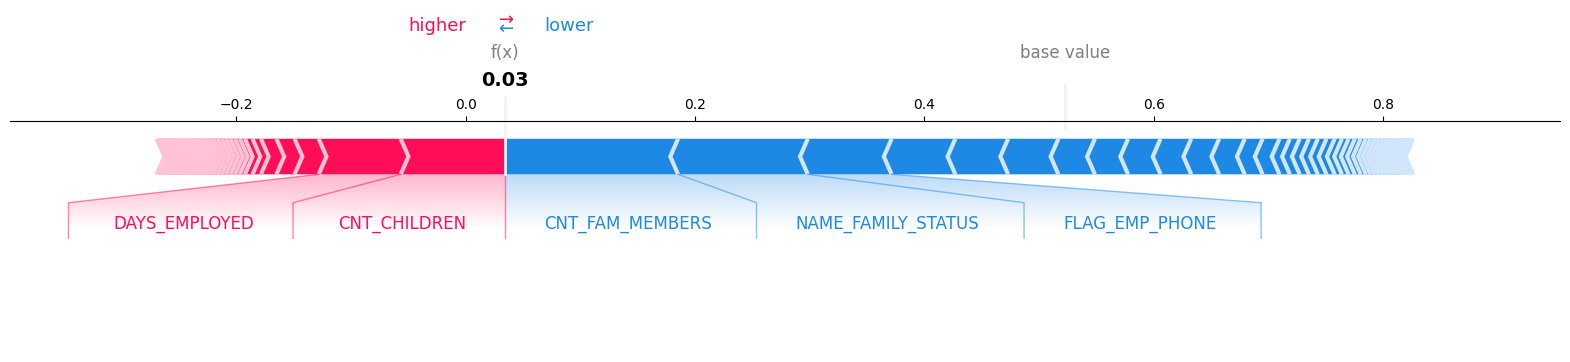

In [26]:
shap.force_plot(
    explainer.expected_value[0].numpy(),
    shap_values[0][0],
    features=columns,
    matplotlib=True,
)

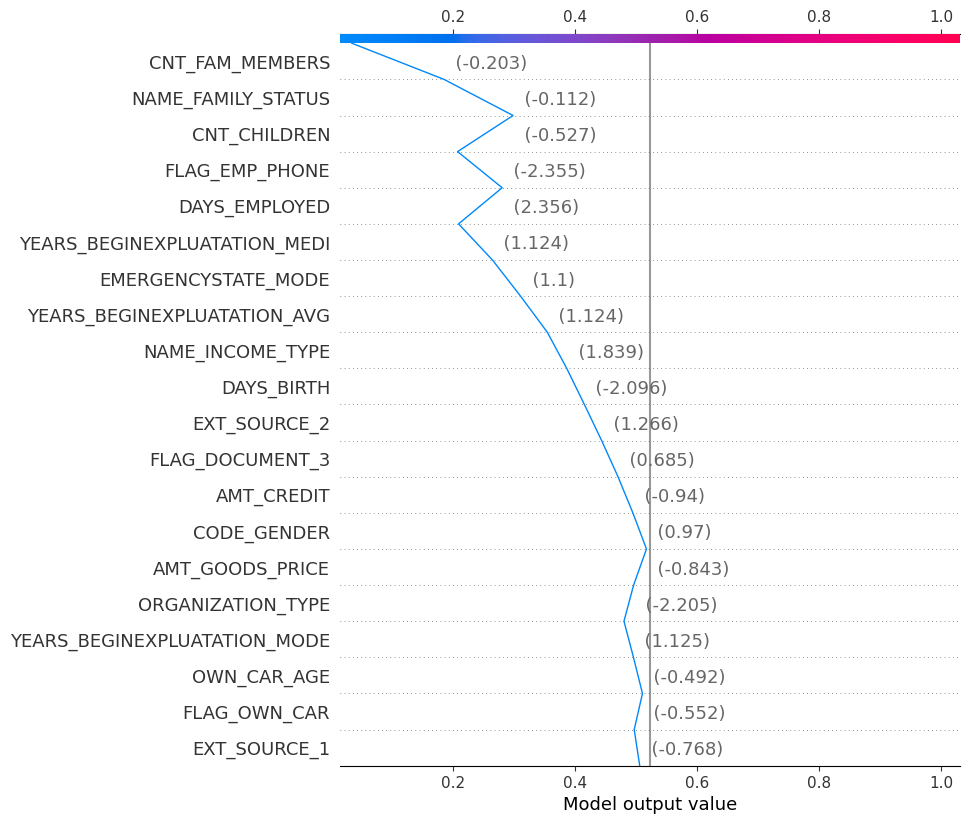

In [27]:
shap.decision_plot(
    explainer.expected_value[0].numpy(),
    shap_values[0][0],
    features=x_test,
    feature_names=list(columns),
)

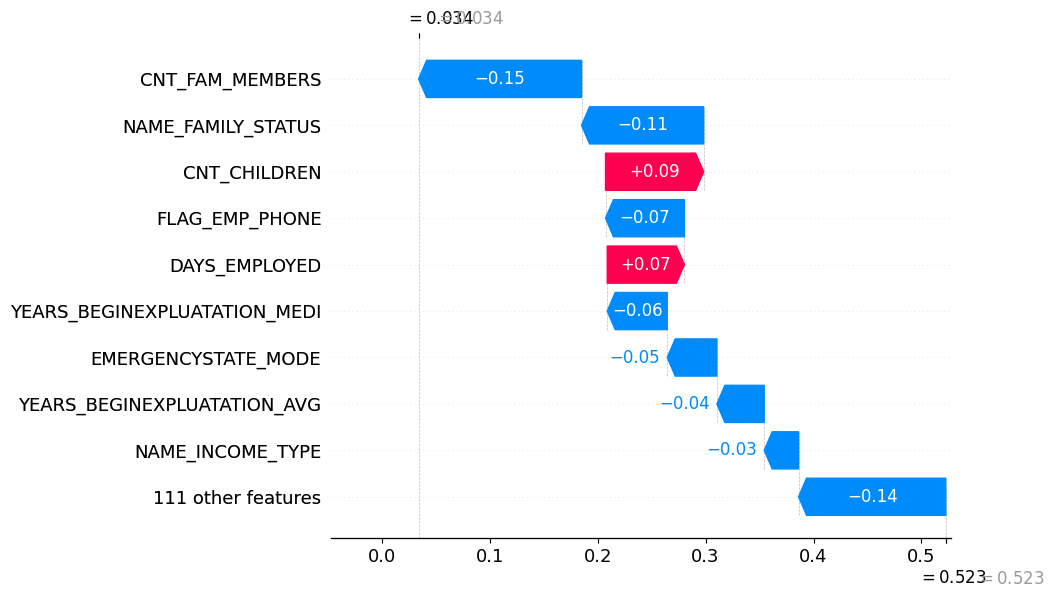

In [28]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[0].numpy(),
    shap_values[0][0],
    feature_names=columns,
)